<a href="https://colab.research.google.com/github/tranletuhien/Tu-Hien/blob/main/CNN_Fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/Fingerprint

[Errno 2] No such file or directory: '/content/drive/MyDrive/Fingerprint'
/content


In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [4]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/Fingerprint/Train', target_size=(100,100),batch_size=32, class_mode='categorical')
Train.class_indices


Found 1668 images belonging to 5 classes.


{'Bac_si': 0, 'Cong_an': 1, 'Giao_vien': 2, 'Hoa_si': 3, 'Ky_su': 4}

In [5]:

model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(MaxPooling2D(2,2)) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten()) 

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=20, batch_size=512, verbose=1)

Epoch 1/20
53/53 [==============================] - 701s 13s/step - loss: 1.4765 - accuracy: 0.3285
Epoch 2/20
53/53 [==============================] - 6s 120ms/step - loss: 1.3932 - accuracy: 0.3675
Epoch 3/20
53/53 [==============================] - 7s 139ms/step - loss: 1.3498 - accuracy: 0.4251
Epoch 4/20
53/53 [==============================] - 6s 119ms/step - loss: 1.3316 - accuracy: 0.4065
Epoch 5/20
53/53 [==============================] - 7s 136ms/step - loss: 1.3338 - accuracy: 0.4077
Epoch 6/20
53/53 [==============================] - 6s 119ms/step - loss: 1.3033 - accuracy: 0.4460
Epoch 7/20
53/53 [==============================] - 7s 137ms/step - loss: 1.2983 - accuracy: 0.4508
Epoch 8/20
53/53 [==============================] - 6s 120ms/step - loss: 1.2627 - accuracy: 0.4658
Epoch 9/20
53/53 [==============================] - 7s 137ms/step - loss: 1.2373 - accuracy: 0.4646
Epoch 10/20
53/53 [==============================] - 6s 118ms/step - loss: 1.2247 - accuracy: 0.4844

In [8]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.9915989637374878
Độ Chính Xác Trên Tập Kiểm Tra :  0.5941246747970581


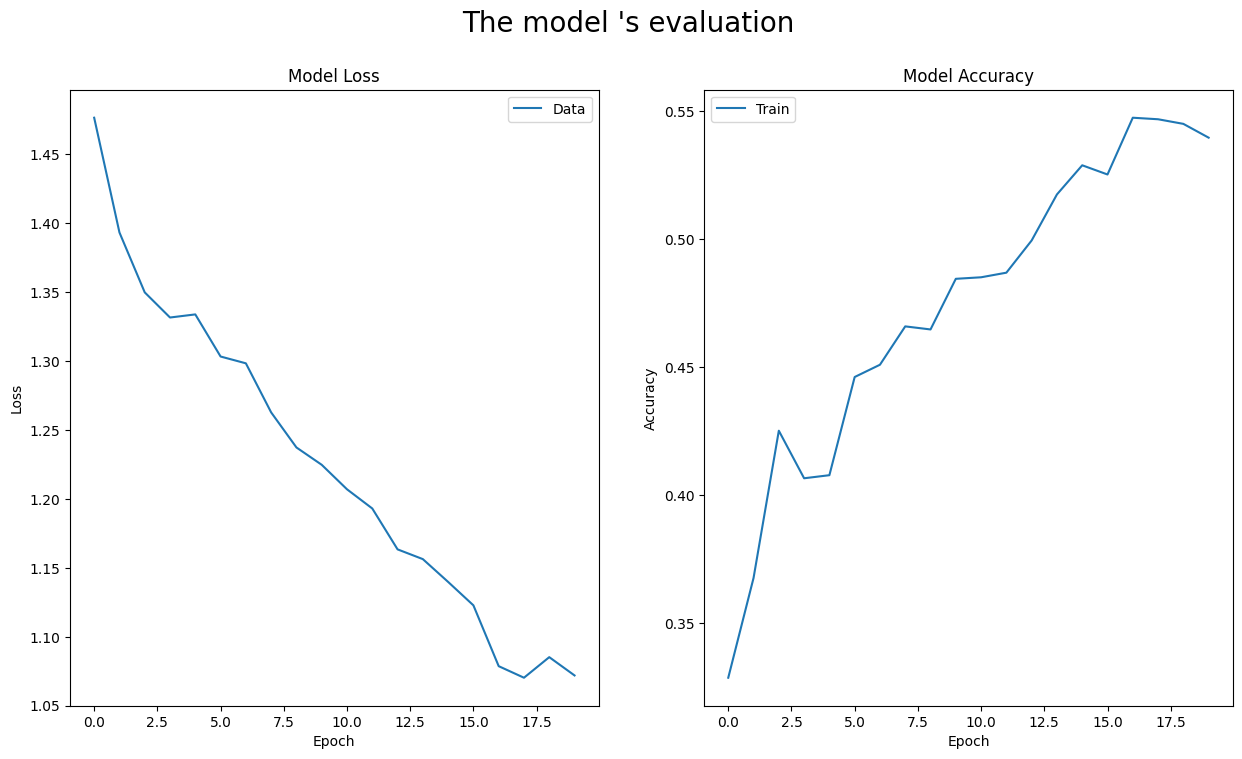

In [9]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])

plt.show()

In [11]:
model.save('/content/drive/MyDrive/Fingerprint/test.h5')

In [12]:
model_1 = load_model('/content/drive/MyDrive/Fingerprint/test.h5')

1/1 [==============================] - 0s 193ms/step
giao vien


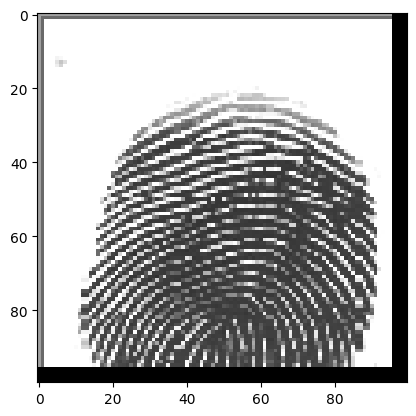

1/1 [==============================] - 0s 20ms/step
hoa si


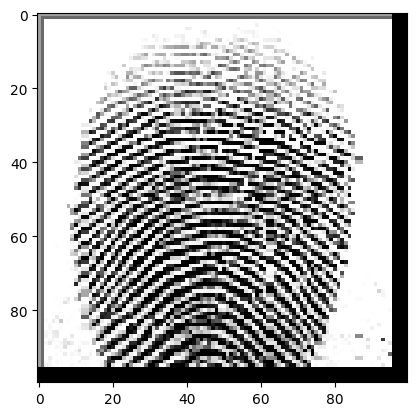

1/1 [==============================] - 0s 26ms/step
hoa si


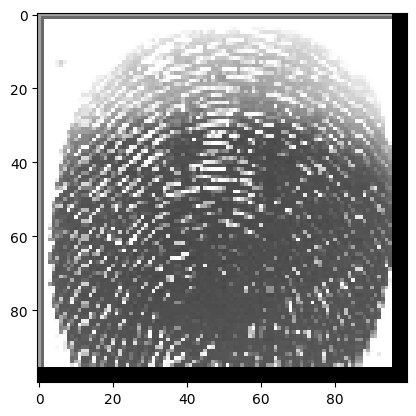

1/1 [==============================] - 0s 26ms/step
hoa si


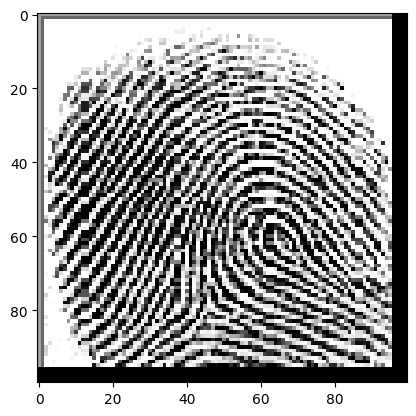

1/1 [==============================] - 0s 31ms/step
bac si


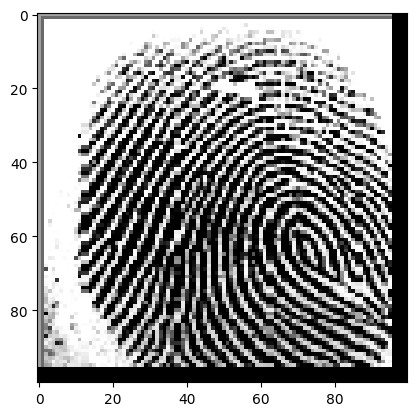

1/1 [==============================] - 0s 18ms/step
giao vien


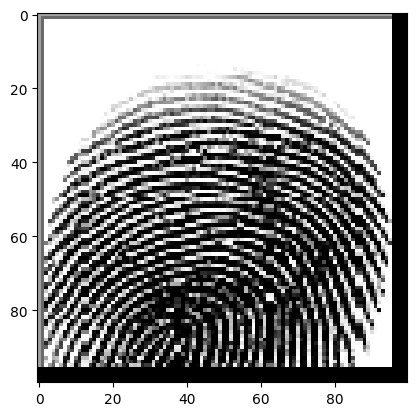

1/1 [==============================] - 0s 18ms/step
hoa si


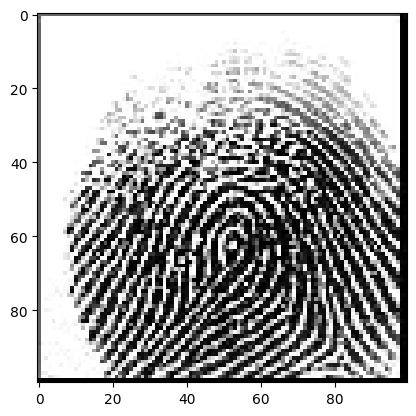

1/1 [==============================] - 0s 18ms/step
giao vien


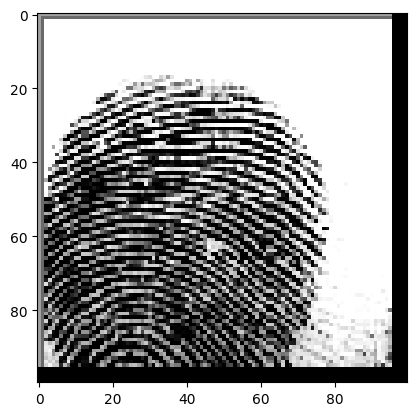

1/1 [==============================] - 0s 17ms/step
bac si


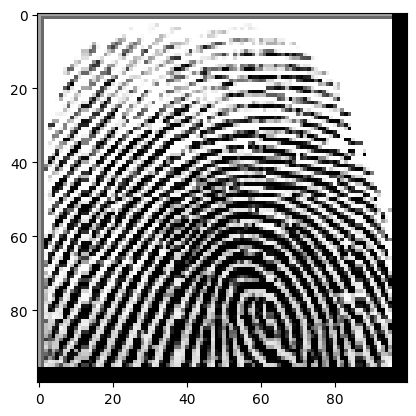

1/1 [==============================] - 0s 20ms/step
giao vien


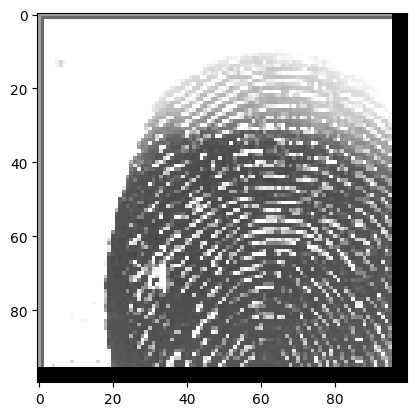

1/1 [==============================] - 0s 18ms/step
bac si


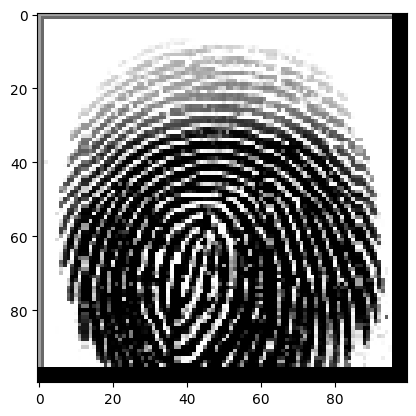

1/1 [==============================] - 0s 17ms/step
hoa si


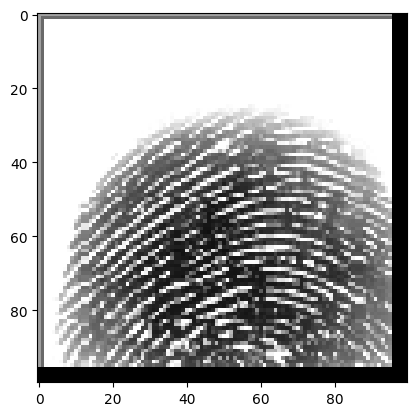

1/1 [==============================] - 0s 21ms/step
cong an


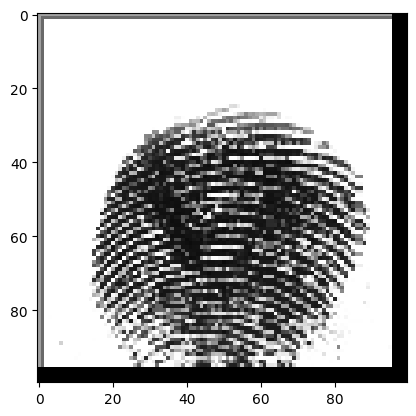

1/1 [==============================] - 0s 19ms/step
bac si


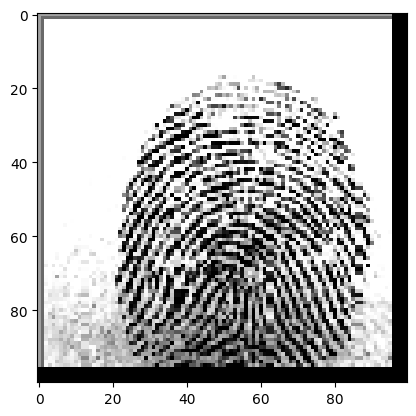

In [13]:
test='/content/drive/MyDrive/Fingerprint/Test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(100,100))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_1.predict(img),axis =1))

  class_name=['bac si','cong an','giao vien','hoa si','ky su','cong nhan']
  
  print(class_name[result])
  plt.show()